In [1]:
# 데이터 구성 패키지 DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 시각화, subpackage pyplot
import matplotlib
import matplotlib.pyplot as plt

# 통계적 시각화 추세 패키지
import seaborn as sns

# 통계 분석 패키지
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest # 비율 검정

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

#export_graphviz: 나무구조 생성및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

matplotlib.rc('font', family = 'NanumSquare')
plt.rc('font', family = 'NanumSquare')

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

In [2]:
! pip install graphviz

In [3]:
df = pd.read_csv("data/MFG_MACHINE.csv", engine="python",encoding="cp949")
df.head()

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [4]:
df.shape

(4000, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   JUDGE                   4000 non-null   object
 1   LOT_ID                  4000 non-null   object
 2   PANEL_ID                4000 non-null   object
 3   DATE_1BLACK             4000 non-null   object
 4   TIME_1BLACK             4000 non-null   object
 5   TIME_2AG                4000 non-null   object
 6   TIME_3BUS               4000 non-null   object
 7   TIME_4DIELEC            4000 non-null   object
 8   TIME_5MGO               4000 non-null   object
 9   TIME_6PHOS              4000 non-null   object
 10  TIME_7PASTE             4000 non-null   object
 11  TIME_8AGING             4000 non-null   object
 12  MC_1BLACK_1PRINT        4000 non-null   object
 13  MC_1BLACK_2RTD          4000 non-null   object
 14  MC_2AG_1PRINT           4000 non-null   object
 15  MC_2

In [6]:
df.isnull().sum()

JUDGE                     0
LOT_ID                    0
PANEL_ID                  0
DATE_1BLACK               0
TIME_1BLACK               0
TIME_2AG                  0
TIME_3BUS                 0
TIME_4DIELEC              0
TIME_5MGO                 0
TIME_6PHOS                0
TIME_7PASTE               0
TIME_8AGING               0
MC_1BLACK_1PRINT          0
MC_1BLACK_2RTD            0
MC_2AG_1PRINT             0
MC_2AG_2RTD               0
MC_2AG_3EXPOSURE          0
MC_3BUS_1DEVELOP          0
MC_3BUS_2FIRE             0
MC_4DIELEC_1FIRE          0
MC_5MGO                   0
MC_6PHOS_1R_1DISPENSER    0
MC_6PHOS_1R_2DRY          0
MC_6PHOS_2G_1DISPENSER    0
MC_6PHOS_2G_2DRY          0
MC_6PHOS_3B_1DISPENSER    0
MC_6PHOS_4FIRE            0
MC_7PASTE                 0
MC_8AGING                 0
dtype: int64

결측치 존재하지 않음 

MACHINE의 설명변수의 형태는 object 이므로 이상치 제거 작업 필요없음

## crosstab_설명변수(범주)와 목표변수(범주)의 관계 파악

In [7]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["JUDGE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["JUDGE"],columns = data[var], 
                      normalize ="columns").round(3))

In [8]:
# 가열로 호기
fun_print_crosstab(df, "LOT_ID")

LOT_ID  LOT-101  LOT-102  LOT-103  LOT-104  LOT-105  LOT-106  LOT-107  \
JUDGE                                                                   
명점            2        1        3        0        2        0        1   
양품           18       19       17       20       18       20       19   

LOT_ID  LOT-108  LOT-109  LOT-110  ...  LOT-291  LOT-292  LOT-293  LOT-294  \
JUDGE                              ...                                       
명점            0        1        2  ...        5        0        3        2   
양품           20       19       18  ...       15       20       17       18   

LOT_ID  LOT-295  LOT-296  LOT-297  LOT-298  LOT-299  LOT-300  
JUDGE                                                         
명점            1        3        2        4        4        3  
양품           19       17       18       16       16       17  

[2 rows x 200 columns]

LOT_ID  LOT-101  LOT-102  LOT-103  LOT-104  LOT-105  LOT-106  LOT-107  \
JUDGE                                       

In [9]:
fun_print_crosstab(df, "PANEL_ID")

PANEL_ID  PNL-01  PNL-02  PNL-03  PNL-04  PNL-05  PNL-06  PNL-07  PNL-08  \
JUDGE                                                                      
명점            25      25      18      18      24      24      21      27   
양품           175     175     182     182     176     176     179     173   

PANEL_ID  PNL-09  PNL-10  PNL-11  PNL-12  PNL-13  PNL-14  PNL-15  PNL-16  \
JUDGE                                                                      
명점            21      20      24      22      25      17      21      17   
양품           179     180     176     178     175     183     179     183   

PANEL_ID  PNL-17  PNL-18  PNL-19  PNL-20  
JUDGE                                     
명점            16      24      14      24  
양품           184     176     186     176  

PANEL_ID  PNL-01  PNL-02  PNL-03  PNL-04  PNL-05  PNL-06  PNL-07  PNL-08  \
JUDGE                                                                      
명점         0.125   0.125    0.09    0.09    0.12    0.12   0.105 

In [10]:
fun_print_crosstab(df, "DATE_1BLACK") 

DATE_1BLACK  2019-04-01  2019-04-02  2019-04-03  2019-04-04  2019-04-05  \
JUDGE                                                                     
명점                    3           3           1           2           0   
양품                   30          29          32          31          32   

DATE_1BLACK  2019-04-06  2019-04-07  2019-04-08  2019-04-09  2019-04-10  ...  \
JUDGE                                                                    ...   
명점                    3           2           1           2           0  ...   
양품                   30          30          32          30          33  ...   

DATE_1BLACK  2019-07-24  2019-07-25  2019-07-26  2019-07-27  2019-07-28  \
JUDGE                                                                     
명점                    7           4           5           5           5   
양품                   26          28          28          27          28   

DATE_1BLACK  2019-07-29  2019-07-30  2019-07-31  2019-08-01  2019-08-02  
JUD

시간에 관련된 설명변수는 crosstab 의미 없음 

In [11]:
fun_print_crosstab(df, "MC_1BLACK_1PRINT") 

MC_1BLACK_1PRINT   1호기   2호기
JUDGE                       
명점                 227   200
양품                1933  1640

MC_1BLACK_1PRINT    1호기    2호기
JUDGE                         
명점                0.105  0.109
양품                0.895  0.891


In [12]:
fun_print_crosstab(df, "MC_1BLACK_2RTD") 

MC_1BLACK_2RTD   1호기   2호기
JUDGE                     
명점               226   201
양품              1954  1619

MC_1BLACK_2RTD    1호기   2호기
JUDGE                      
명점              0.104  0.11
양품              0.896  0.89


In [13]:
fun_print_crosstab(df, "MC_2AG_1PRINT") 

MC_2AG_1PRINT   1호기   2호기
JUDGE                    
명점              220   207
양품             1800  1773

MC_2AG_1PRINT    1호기    2호기
JUDGE                      
명점             0.109  0.105
양품             0.891  0.895


In [14]:
fun_print_crosstab(df, "MC_2AG_2RTD")

MC_2AG_2RTD   1호기   2호기
JUDGE                  
명점            255   172
양품           1925  1648

MC_2AG_2RTD    1호기    2호기
JUDGE                    
명점           0.117  0.095
양품           0.883  0.905


In [15]:
fun_print_crosstab(df, "MC_2AG_3EXPOSURE")

MC_2AG_3EXPOSURE   1호기   2호기
JUDGE                       
명점                 219   208
양품                1801  1772

MC_2AG_3EXPOSURE    1호기    2호기
JUDGE                         
명점                0.108  0.105
양품                0.892  0.895


In [16]:
fun_print_crosstab(df, "MC_3BUS_1DEVELOP")

MC_3BUS_1DEVELOP   1호기   2호기
JUDGE                       
명점                 228   199
양품                1732  1841

MC_3BUS_1DEVELOP    1호기    2호기
JUDGE                         
명점                0.116  0.098
양품                0.884  0.902


In [17]:
fun_print_crosstab(df, "MC_3BUS_2FIRE") 

MC_3BUS_2FIRE   1호기   2호기
JUDGE                    
명점              223   204
양품             1957  1616

MC_3BUS_2FIRE    1호기    2호기
JUDGE                      
명점             0.102  0.112
양품             0.898  0.888


In [18]:
fun_print_crosstab(df, "MC_4DIELEC_1FIRE") 

MC_4DIELEC_1FIRE   1호기   2호기   3호기
JUDGE                             
명점                 146   162   119
양품                1194  1118  1261

MC_4DIELEC_1FIRE    1호기    2호기    3호기
JUDGE                                
명점                0.109  0.127  0.086
양품                0.891  0.873  0.914


In [19]:
fun_print_crosstab(df, "MC_5MGO")  

MC_5MGO   1호기   2호기
JUDGE              
명점        198   229
양품       1762  1811

MC_5MGO    1호기    2호기
JUDGE                
명점       0.101  0.112
양품       0.899  0.888


In [20]:
fun_print_crosstab(df, "MC_6PHOS_1R_1DISPENSER")  

MC_6PHOS_1R_1DISPENSER   1호기   2호기
JUDGE                             
명점                       242   185
양품                      1998  1575

MC_6PHOS_1R_1DISPENSER    1호기    2호기
JUDGE                               
명점                      0.108  0.105
양품                      0.892  0.895


In [21]:
fun_print_crosstab(df, "MC_6PHOS_1R_2DRY")  

MC_6PHOS_1R_2DRY   1호기   2호기
JUDGE                       
명점                 209   218
양품                1651  1922

MC_6PHOS_1R_2DRY    1호기    2호기
JUDGE                         
명점                0.112  0.102
양품                0.888  0.898


In [22]:
fun_print_crosstab(df, "MC_6PHOS_2G_1DISPENSER")  

MC_6PHOS_2G_1DISPENSER   1호기   2호기
JUDGE                             
명점                       236   191
양품                      1884  1689

MC_6PHOS_2G_1DISPENSER    1호기    2호기
JUDGE                               
명점                      0.111  0.102
양품                      0.889  0.898


In [23]:
fun_print_crosstab(df, "MC_6PHOS_2G_2DRY")  

MC_6PHOS_2G_2DRY   1호기   2호기
JUDGE                       
명점                 223   204
양품                2037  1536

MC_6PHOS_2G_2DRY    1호기    2호기
JUDGE                         
명점                0.099  0.117
양품                0.901  0.883


In [24]:
fun_print_crosstab(df, "MC_6PHOS_3B_1DISPENSER")  

MC_6PHOS_3B_1DISPENSER   1호기   2호기
JUDGE                             
명점                       217   210
양품                      1883  1690

MC_6PHOS_3B_1DISPENSER    1호기    2호기
JUDGE                               
명점                      0.103  0.111
양품                      0.897  0.889


In [25]:
fun_print_crosstab(df, "MC_6PHOS_4FIRE")  

MC_6PHOS_4FIRE   1호기   2호기   3호기
JUDGE                           
명점               104   156   167
양품              1056  1264  1253

MC_6PHOS_4FIRE   1호기   2호기    3호기
JUDGE                            
명점              0.09  0.11  0.118
양품              0.91  0.89  0.882


In [26]:
fun_print_crosstab(df, "MC_7PASTE")  

MC_7PASTE   1호기   2호기
JUDGE                
명점          231   196
양품         1969  1604

MC_7PASTE    1호기    2호기
JUDGE                  
명점         0.105  0.109
양품         0.895  0.891


In [27]:
fun_print_crosstab(df, "MC_8AGING")  

MC_8AGING   1호기   2호기
JUDGE                
명점          242   185
양품         1958  1615

MC_8AGING   1호기    2호기
JUDGE                 
명점         0.11  0.103
양품         0.89  0.897


호기관련 설명변수는 호기별로 불량률 특별한 차이가 없음 

## 카이제곱

In [28]:
result = pd.crosstab(df.MC_1BLACK_1PRINT,df.JUDGE)
result

JUDGE,명점,양품
MC_1BLACK_1PRINT,,
1호기,227,1933
2호기,200,1640


In [29]:
from scipy.stats import chi2_contingency

In [30]:
chi2, pval, dof, expected = chi2_contingency(result)

In [31]:
stats.chi2_contingency(observed = result)

(0.1001264783903205,
 0.7516779078099791,
 1,
 array([[ 230.58, 1929.42],
        [ 196.42, 1643.58]]))

귀무가설 : MC_1BLACK_1PRINT 의 1호기와 2호기의 양품과 명점의 차이가 없다.   
대립가설 : MC_1BLACK_1PRINT 의 1호기와 2호기의 양품과 명점의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 MC_1BLACK_1PRINT의 1호기와 2호기의 양품과 명점의 차이가 없다.

In [32]:
result = pd.crosstab(df.MC_1BLACK_2RTD,df.JUDGE)
result

JUDGE,명점,양품
MC_1BLACK_2RTD,,
1호기,226,1954
2호기,201,1619


In [33]:
chi2, pval, dof, expected = chi2_contingency(result)

In [34]:
stats.chi2_contingency(observed = result)

(0.4083884652385775,
 0.5227885920529354,
 1,
 array([[ 232.715, 1947.285],
        [ 194.285, 1625.715]]))

In [35]:
stats.chi2_contingency(observed = result)

(0.4083884652385775,
 0.5227885920529354,
 1,
 array([[ 232.715, 1947.285],
        [ 194.285, 1625.715]]))

귀무가설 : MC_1BLACK_2RTD의 1호기와 2호기의 양품과 명점의 차이가 없다.   
대립가설 : MC_1BLACK_2RTD의 1호기와 2호기의 양품과 명점의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 MC_1BLACK_2RTD의 1호기와 2호기의 양품과 명점의 차이가 없다.

In [36]:
result = pd.crosstab(df.MC_2AG_1PRINT,df.JUDGE)
result

JUDGE,명점,양품
MC_2AG_1PRINT,,
1호기,220,1800
2호기,207,1773


In [37]:
stats.chi2_contingency(observed = result)

(0.15667565520374716,
 0.6922357871871667,
 1,
 array([[ 215.635, 1804.365],
        [ 211.365, 1768.635]]))

귀무가설 : MC_2AG_1PRINT의 1호기와 2호기의 양품과 명점의 차이가 없다.   
대립가설 : MC_2AG_1PRINT의 1호기와 2호기의 양품과 명점의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 MC_2AG_1PRINT의 1호기와 2호기의 양품과 명점의 차이가 없다.

In [38]:
result = pd.crosstab(df.MC_2AG_2RTD,df.JUDGE)
result

JUDGE,명점,양품
MC_2AG_2RTD,,
1호기,255,1925
2호기,172,1648


In [39]:
stats.chi2_contingency(observed = result)

(5.017718921564835,
 0.025089199618344136,
 1,
 array([[ 232.715, 1947.285],
        [ 194.285, 1625.715]]))

귀무가설 : MC_2AG_2RTD의 1호기와 2호기의 양품과 명점의 차이가 없다.   
대립가설 : MC_2AG_2RTD의 1호기와 2호기의 양품과 명점의 차이가 있다.  

결론 : Pvalue값이 0.05이하로 MC_2AG_1PRINT의 1호기와 2호기의 양품과 명점의 차이가 있다.

In [40]:
result = pd.crosstab(df.MC_2AG_3EXPOSURE,df.JUDGE)
result

JUDGE,명점,양품
MC_2AG_3EXPOSURE,,
1호기,219,1801
2호기,208,1772


In [41]:
stats.chi2_contingency(observed = result)

(0.08608981521799142,
 0.7692082785753981,
 1,
 array([[ 215.635, 1804.365],
        [ 211.365, 1768.635]]))

귀무가설 : MC_2AG_3EXPOSURE의 1호기와 2호기의 양품과 명점의 차이가 없다.   
대립가설 : MC_2AG_3EXPOSURE의 1호기와 2호기의 양품과 명점의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 MC_2AG_3EXPOSURE의 1호기와 2호기의 양품과 명점의 차이가 없다.

In [42]:
result = pd.crosstab(df.MC_3BUS_1DEVELOP,df.JUDGE)
result

JUDGE,명점,양품
MC_3BUS_1DEVELOP,,
1호기,228,1732
2호기,199,1841


In [43]:
stats.chi2_contingency(observed = result)

(3.501949980966912,
 0.06129661555446475,
 1,
 array([[ 209.23, 1750.77],
        [ 217.77, 1822.23]]))

귀무가설 : MC_3BUS_1DEVELOP의 1호기와 2호기의 양품과 명점의 차이가 없다.   
대립가설 : MC_3BUS_1DEVELOP의 1호기와 2호기의 양품과 명점의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 MC_3BUS_1DEVELOP의 1호기와 2호기의 양품과 명점의 차이가 없다.

In [44]:
result = pd.crosstab(df.MC_3BUS_2FIRE,df.JUDGE)
result

JUDGE,명점,양품
MC_3BUS_2FIRE,,
1호기,223,1957
2호기,204,1616


In [45]:
stats.chi2_contingency(observed = result)

(0.8978047117367476,
 0.34337103137403047,
 1,
 array([[ 232.715, 1947.285],
        [ 194.285, 1625.715]]))

귀무가설 : MC_3BUS_1DEVELOP의 1호기와 2호기의 양품과 명점의 차이가 없다.   
대립가설 : MC_3BUS_1DEVELOP의 1호기와 2호기의 양품과 명점의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 MC_3BUS_1DEVELOP의 1호기와 2호기의 양품과 명점의 차이가 없다.

In [46]:
result = pd.crosstab(df.MC_4DIELEC_1FIRE,df.JUDGE)
result

JUDGE,명점,양품
MC_4DIELEC_1FIRE,,
1호기,146,1194
2호기,162,1118
3호기,119,1261


In [47]:
stats.chi2_contingency(observed = result)

(11.4303216299264,
 0.003295620493948868,
 2,
 array([[ 143.045, 1196.955],
        [ 136.64 , 1143.36 ],
        [ 147.315, 1232.685]]))

귀무가설 : MC_4DIELEC_1FIRE의 1호기와 2호기와 3호기의 양품과 명점의 차이가 없다.   
대립가설 : 적어도 MC_4DIELEC_1FIRE의 1호기와 2호기와 3호기의 양품과 명점의 차이가 하나는 있다.  

결론 : Pvalue값이 0.05이하로 적어도 MC_4DIELEC_1FIRE의 1호기와 2호기와 3호기의 양품과 명점의 차이가 하나는 있다. 

In [48]:
result = pd.crosstab(df.MC_5MGO,df.JUDGE)
result

JUDGE,명점,양품
MC_5MGO,,
1호기,198,1762
2호기,229,1811


In [49]:
stats.chi2_contingency(observed = result)

(1.2079036341505902,
 0.271747699547607,
 1,
 array([[ 209.23, 1750.77],
        [ 217.77, 1822.23]]))

귀무가설 : MC_5MGO의 1호기와 2호기의 차이가 없다.   
대립가설 : MC_5MGO의 1호기와 2호기의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 적어도 MC_5MGO의 1호기와 2호기의 양품과 명점의 차이가 없다. 

In [50]:
result = pd.crosstab(df.MC_6PHOS_1R_1DISPENSER,df.JUDGE)
result

JUDGE,명점,양품
MC_6PHOS_1R_1DISPENSER,,
1호기,242,1998
2호기,185,1575


In [51]:
stats.chi2_contingency(observed = result)

(0.06027154311417471,
 0.8060672692273391,
 1,
 array([[ 239.12, 2000.88],
        [ 187.88, 1572.12]]))

귀무가설 : MC_6PHOS_1R_1DISPENSER 1호기와 2호기의 차이가 없다.   
대립가설 : MC_6PHOS_1R_1DISPENSER 1호기와 2호기의 차이가 있다.  

결론 : Pvalue값이 0.05이상으로 적어도 MC_6PHOS_1R_1DISPENSER 1호기와 2호기의 양품과 명점의 차이가 없다. 

In [52]:
result = pd.crosstab(df.MC_6PHOS_1R_2DRY,df.JUDGE)
result

JUDGE,명점,양품
MC_6PHOS_1R_2DRY,,
1호기,209,1651
2호기,218,1922


In [53]:
stats.chi2_contingency(observed = result)

(1.04232208571592,
 0.30728203053984415,
 1,
 array([[ 198.555, 1661.445],
        [ 228.445, 1911.555]]))

In [54]:
result = pd.crosstab(df.MC_6PHOS_2G_1DISPENSER,df.JUDGE)
result

JUDGE,명점,양품
MC_6PHOS_2G_1DISPENSER,,
1호기,236,1884
2호기,191,1689


In [55]:
stats.chi2_contingency(observed = result)

(0.8889071414812396,
 0.3457736340797285,
 1,
 array([[ 226.31, 1893.69],
        [ 200.69, 1679.31]]))

In [56]:
result = pd.crosstab(df.MC_6PHOS_2G_2DRY,df.JUDGE)
result

JUDGE,명점,양품
MC_6PHOS_2G_2DRY,,
1호기,223,2037
2호기,204,1536


In [57]:
stats.chi2_contingency(observed = result)

(3.362813239673125,
 0.06668406025463536,
 1,
 array([[ 241.255, 2018.745],
        [ 185.745, 1554.255]]))

In [58]:
result = pd.crosstab(df.MC_6PHOS_3B_1DISPENSER,df.JUDGE)
result

JUDGE,명점,양품
MC_6PHOS_3B_1DISPENSER,,
1호기,217,1883
2호기,210,1690


In [59]:
stats.chi2_contingency(observed = result)

(0.4684343424823074,
 0.4937083273003766,
 1,
 array([[ 224.175, 1875.825],
        [ 202.825, 1697.175]]))

In [60]:
result = pd.crosstab(df.MC_6PHOS_4FIRE,df.JUDGE)
result

JUDGE,명점,양품
MC_6PHOS_4FIRE,,
1호기,104,1056
2호기,156,1264
3호기,167,1253


In [61]:
stats.chi2_contingency(observed = result)

(5.453935430314811,
 0.06541735327250357,
 2,
 array([[ 123.83 , 1036.17 ],
        [ 151.585, 1268.415],
        [ 151.585, 1268.415]]))

In [62]:
result = pd.crosstab(df.MC_7PASTE,df.JUDGE)
result

JUDGE,명점,양품
MC_7PASTE,,
1호기,231,1969
2호기,196,1604


In [63]:
stats.chi2_contingency(observed = result)

(0.1188812905100351,
 0.7302510015521775,
 1,
 array([[ 234.85, 1965.15],
        [ 192.15, 1607.85]]))

In [64]:
result = pd.crosstab(df.MC_8AGING,df.JUDGE)
result

JUDGE,명점,양품
MC_8AGING,,
1호기,242,1958
2호기,185,1615


In [65]:
stats.chi2_contingency(observed = result)

(0.46845425436222743,
 0.4936991445672084,
 1,
 array([[ 234.85, 1965.15],
        [ 192.15, 1607.85]]))

In [66]:
result = pd.crosstab(df.MC_7PASTE,df.JUDGE)
result

JUDGE,명점,양품
MC_7PASTE,,
1호기,231,1969
2호기,196,1604


In [67]:
stats.chi2_contingency(observed = result)

(0.1188812905100351,
 0.7302510015521775,
 1,
 array([[ 234.85, 1965.15],
        [ 192.15, 1607.85]]))

In [68]:
result = pd.crosstab(df.MC_8AGING,df.JUDGE)
result

JUDGE,명점,양품
MC_8AGING,,
1호기,242,1958
2호기,185,1615


In [69]:
stats.chi2_contingency(observed = result)

(0.46845425436222743,
 0.4936991445672084,
 1,
 array([[ 234.85, 1965.15],
        [ 192.15, 1607.85]]))

1. 차이 없음
MC_1BLACK_1PRINT  
MC_1BLACK_2RTD  
MC_2AG_1PRINT  
MC_2AG_3EXPOSURE  
MC_3BUS_1DEVELOP  
MC_3BUS_2FIRE  
MC_5MGO  
MC_6PHOS_1R_1DISPENSER  
MC_6PHOS_1R_2DRY  
MC_6PHOS_2G_1DISPENSER  
MC_6PHOS_2G_2DRY  
MC_6PHOS_4FIRE  
MC_7PASTE  
  

2. 차이 있음   
MC_2AG_2RTD   0.025
MC_4DIELEC_1FIRE  0.003
MC_3BUS_1DEVELOP  0.06
MC_6PHOS_4FIRE  0.065
MC_6PHOS_2G_2DRY  0.067

 

# 의사결정나무

In [70]:
df

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,명점,LOT-300,PNL-16,2019-08-01,2019-08-01 21:38,2019-08-02 2:58,2019-08-02 8:38,2019-08-07 11:18,2019-08-12 1:18,2019-08-04 14:38,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3996,양품,LOT-300,PNL-17,2019-08-01,2019-08-01 22:23,2019-08-02 3:43,2019-08-02 9:23,2019-08-07 12:03,2019-08-12 2:03,2019-08-04 15:23,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3997,양품,LOT-300,PNL-18,2019-08-01,2019-08-01 23:07,2019-08-02 4:27,2019-08-02 10:07,2019-08-07 12:47,2019-08-12 2:47,2019-08-04 16:07,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3998,명점,LOT-300,PNL-19,2019-08-01,2019-08-01 23:51,2019-08-02 5:11,2019-08-02 10:51,2019-08-07 13:31,2019-08-12 3:31,2019-08-04 16:51,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기


In [71]:
yang, bull =0, 0
size =range(101,301)
for lot in size:
    yang, bull =0,0
for x in df[df['LOT_ID']=='%s'%lot]['JUDGE']:
    if x ==1 :
        yang+=1
else:
    bull+=1
    print("lot:",lot,"양품",yang,"불량",bull)

lot: 300 양품 0 불량 1


In [72]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeClassifier

In [73]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#export_graphviz: 나무구조 생성및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

matplotlib.rc('font', family = 'NanumSquare')
plt.rc('font', family = 'NanumSquare')

In [74]:
df_machine=df[['JUDGE','MC_1BLACK_1PRINT',
'MC_1BLACK_2RTD',
'MC_2AG_1PRINT',
'MC_2AG_2RTD',
'MC_2AG_3EXPOSURE',
'MC_3BUS_1DEVELOP',
'MC_3BUS_2FIRE',
'MC_4DIELEC_1FIRE',
'MC_5MGO',
'MC_6PHOS_1R_1DISPENSER',
'MC_6PHOS_1R_2DRY',
'MC_6PHOS_2G_1DISPENSER',
'MC_6PHOS_2G_2DRY',
'MC_6PHOS_3B_1DISPENSER',
'MC_6PHOS_4FIRE',
'MC_7PASTE',
'MC_8AGING',
]]

In [75]:
df_machine.head()

,JUDGE,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [76]:
df_machine_y = df[["JUDGE"]]
df_machine_y

,JUDGE
0,양품
1,양품
2,양품
3,양품
4,양품
...,...
3995,명점
3996,양품
3997,양품
3998,명점


In [77]:
df_machine_x = df_machine.drop("JUDGE", axis=1, inplace=False)
df_machine_x

,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2호기,1호기,1호기,1호기,1호기,2호기,1호기,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3996,2호기,1호기,1호기,1호기,1호기,2호기,1호기,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3997,2호기,1호기,1호기,1호기,1호기,2호기,1호기,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3998,2호기,1호기,1호기,1호기,1호기,2호기,1호기,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기


In [78]:
df_machine_y_dummy = pd.get_dummies(df_machine_y)
df_machine_y_dummy.describe()

,JUDGE_명점,JUDGE_양품
count,4000.000000,4000.000000
mean,0.106750,0.893250
std,0.308834,0.308834
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [79]:
df_machine_x_dummy = pd.get_dummies(df_machine_x)
df_machine_x_dummy.head()

,MC_1BLACK_1PRINT_1호기,MC_1BLACK_1PRINT_2호기,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_1PRINT_1호기,MC_2AG_1PRINT_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,...,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_3B_1DISPENSER_1호기,MC_6PHOS_3B_1DISPENSER_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기,MC_7PASTE_1호기,MC_7PASTE_2호기,MC_8AGING_1호기,MC_8AGING_2호기
0,0,1,0,1,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,1
1,0,1,0,1,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,1
2,0,1,0,1,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,1
3,0,1,0,1,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,1
4,0,1,0,1,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,1


In [80]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_machine_x_dummy, df_machine_y_dummy,
                                                               test_size = 0.3, random_state = 1234)

df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y,
                                                               test_size = 3/7, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (1600, 36)
train data Y size : (1600, 2)
test data X size : (1200, 36)
test data Y size : (1200, 2)
validation data X size : (1200, 36)
validation data Y size : (1200, 2)


In [81]:
tree_uncustomized = DTC(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.893
Score on training set: 0.898


In [82]:
#max_depth: 최대깊이 변경에 따른 모델 성능

train_accuracy = []
test_accuracy =[]

para_depth = [depth for depth in range(1,20)]

for v_max_depth in para_depth:
    tree = DTC(max_depth = v_max_depth, random_state= 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.894,0.886
1,2,0.894,0.886
2,3,0.894,0.886
3,4,0.894,0.886
4,5,0.894,0.886
5,6,0.894,0.886
6,7,0.894,0.886
7,8,0.894,0.886
8,9,0.894,0.886
9,10,0.893,0.876


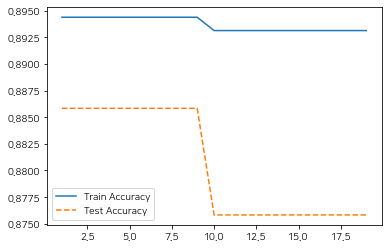

In [83]:
plt.plot(para_depth, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

In [84]:
#변수명 저장
v_feature_name = df_train_x.columns

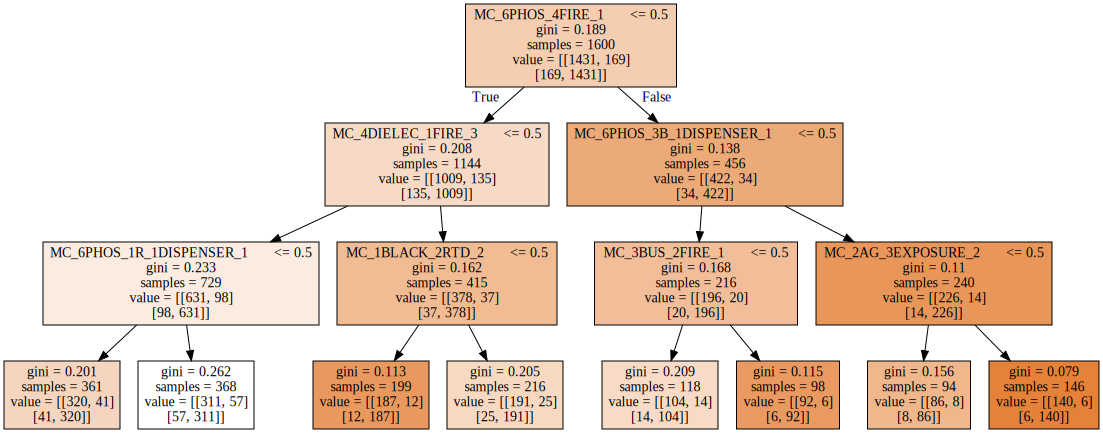

In [85]:
#깊이가 3인 모델
tree_low = DTC(random_state = 1234, max_depth = 3)
tree_low.fit(df_train_x,df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["good", "bad"],
                feature_names = v_feature_name, impurity = True, filled= True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [86]:
train_accuracy = []
test_accuracy =[]
para_split = [n_split * 2 for n_split in range(1,10)]
#para_split = [n_split * 5 for n_split in range(1,11)]
#para_split = [n_split * 10 for n_split in range(1,11)]
for v_min_samples_split in para_split:
    tree = DTC(random_state = 1234, max_depth = 1,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x,df_val_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesLeaf"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.894,0.886
1,4,0.894,0.886
2,6,0.894,0.886
3,8,0.894,0.886
4,10,0.894,0.886
5,12,0.894,0.886
6,14,0.894,0.886
7,16,0.894,0.886
8,18,0.894,0.886


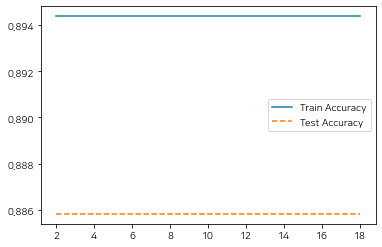

In [87]:
plt.plot(para_split, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

In [88]:
train_accuracy = []
test_accuracy =[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DTC(random_state = 1234, min_samples_leaf = v_min_samples_leaf, max_depth=1)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x,df_val_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_accuracy
df_score_leaf["TestScore"] = test_accuracy
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.894,0.886
1,4,0.894,0.886
2,6,0.894,0.886
3,8,0.894,0.886
4,10,0.894,0.886
5,12,0.894,0.886
6,14,0.894,0.886
7,16,0.894,0.886
8,18,0.894,0.886
9,20,0.894,0.886


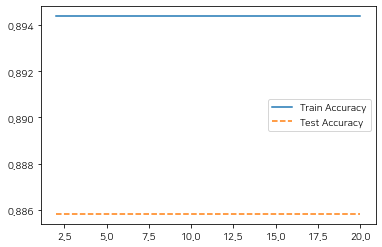

In [89]:
plt.plot(para_leaf, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

In [90]:
#최종모델
tree_final = DTC(random_state = 1234, max_depth = 4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=4, random_state=1234)

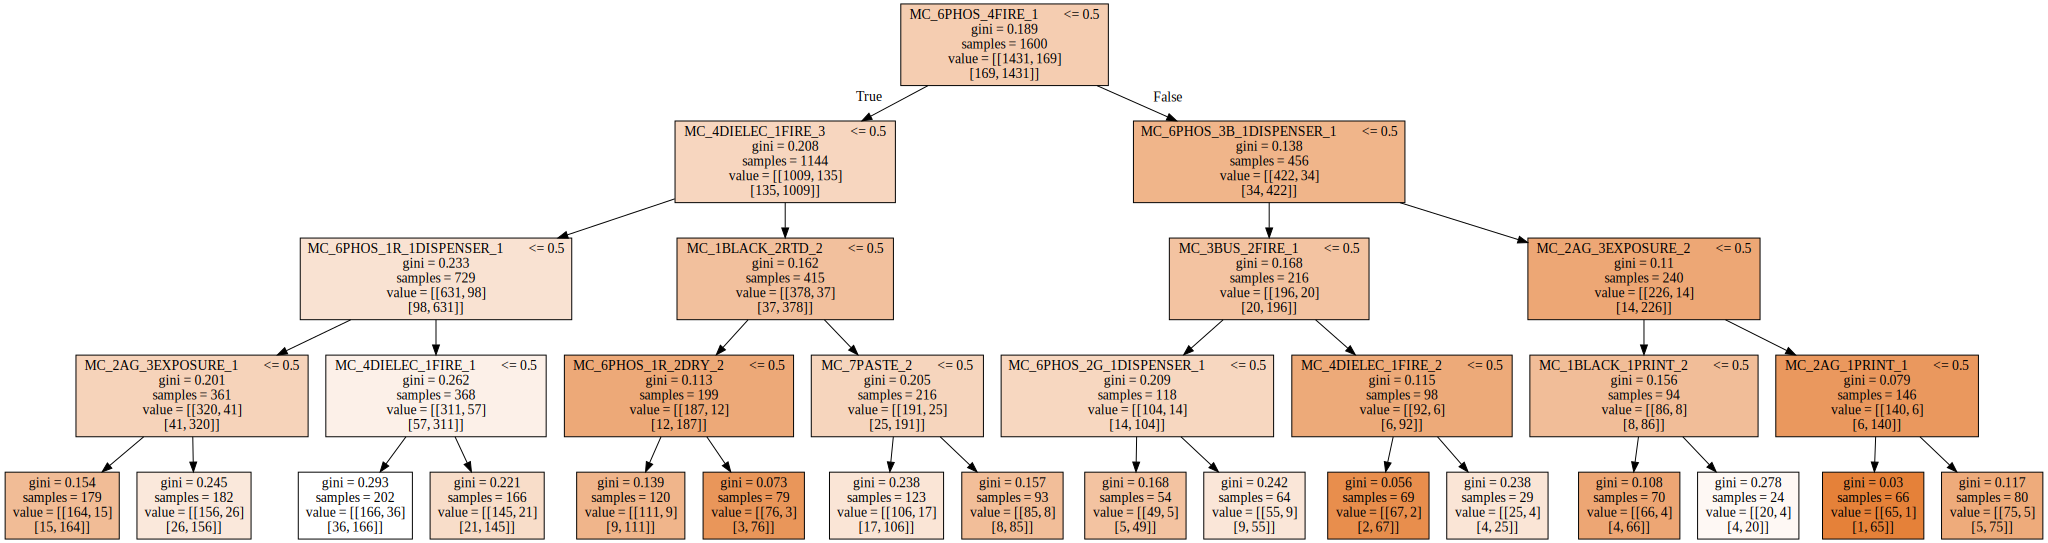

In [91]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled= True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [92]:
y_pred = tree_final.predict(df_test_x)
print("Train Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x,df_train_y)), end ="")
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix56:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Train Accuracy: 0.894
Test Accuracy: 0.899



ValueError: multilabel-indicator is not supported

In [ ]:
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:7]
df_importance7.round(4)

In [ ]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# GridSearchCV 이용한 DecisionTreeClassifier 최적의 파라미터 찾기
estimator = DecisionTreeClassifier()

param_grid = {"max_depth" :para_depth, "min_samples_split":para_split,"min_samples_leaf":para_leaf}

grid_dt =GridSearchCV(estimator, param_grid,scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model :\n{}".format(grid_dt.best_estimator_))
print("\nbest paramator model :\n{}".format(grid_dt.best_params_))
print("\nbest score :\n{}".format(grid_dt.best_score_.round(3)))

# 랜덤포레스트 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_machine_x_dummy, df_machine_y_dummy,
                                                               test_size = 0.3, random_state = 1234)

df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y,
                                                               test_size = 3/7, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

In [ ]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on val set:{:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

In [ ]:
#n_estimators 트리수 변경에 따른 모델 성능

train_accuracy = []; val_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,6)]
 
for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, 
                                  n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["ValAccuracy"] = val_accuracy

df_accuracy_n.round(3)

In [ ]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy, linestyle="--", label="Val Accuracy")
plt.xlabel('n_estimators');plt.ylabel('accuracy')
plt.legend()

In [ ]:
#error 저장 리스트

oob_error = []

for v_n_estimator in range(1,6):
    rf=RandomForestClassifier(n_estimators = v_n_estimator, 
                             oob_score = True, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1 - rf.oob_score_)

In [ ]:
#그래프로 표현
plt.plot(range(1,6), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')
#트리 수 지정
n_estimators = 35

In [ ]:
#max_depth
#train 및 test 정확도 결과 저장용
train_accuracy = []; val_accuracy = []

#max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,6)]
 
for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 35, 
                                  max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["ValAccuracy"] = val_accuracy

df_accuracy_depth.round(3)

In [ ]:
#모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, val_accuracy, linestyle="--", label="Val Accuracy")
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()

#최대 깊이 지정
# max_depth = 20

In [ ]:
#min_samples_split
train_accuracy = []; val_accuracy = []
para_split = [n_split * 10 for n_split in range(1,6)]
 
for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split,
                                  max_depth = 20, n_estimators= 40, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuacy"] = train_accuracy
df_accuracy_split["ValAccuacy"] = val_accuracy

df_accuracy_split.round(3)

In [ ]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, val_accuracy, linestyle="--", label="Val Accuracy")
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

In [ ]:
#min_samples_leaf
train_accuracy = []; val_accuracy = []
para_leaf = [n_leaf for n_leaf in range(1,6)]
 
for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                    max_depth = 20, n_estimators = 35, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["ValAccuracy"] = val_accuracy

df_accuracy_leaf.round(3)

In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, val_accuracy, linestyle="--", label="Val Accuracy")
plt.legend()

In [ ]:
#결론 도출
#최종 모델 선택
rf_final = RandomForestClassifier(min_samples_leaf = 2, max_depth = 4, n_estimators = 40, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)
#평가
y_pred = rf_final.predict(df_test_x)

#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(rf_final.score(df_test_x, df_test_y)))
#train 데이터 셋 정확도
print("Accuracy:on test set:{:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

In [ ]:
#변수명
v_feature_name = df_train_x.columns
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_
#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance10 = df_importance[:10]
df_importance10.round(3)

In [ ]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance10.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance10))
plt.barh(y = coordinates, width = df_importance10["Importance"])
plt.yticks(coordinates, df_importance10["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_machine_x_dummy, df_machine_y_dummy,
                                                               test_size = 0.3, random_state = 1234)

df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y,
                                                               test_size = 3/7, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

In [ ]:
#모델생성
gb_uncustomized=GBC(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))

print("Accuracy on test set : {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

In [ ]:
train_accuracy=[]
val_accuracy=[]


para_lr=[lr*0.1 for lr in range(1,6)]


for v_learning_rate in para_lr:
    
    gb=GBC(learning_rate=v_learning_rate, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr["LearningRate"]=para_lr
df_accuracy_lr["TrainAccuracy"]=train_accuracy
df_accuracy_lr["valAccuracy"]=val_accuracy
df_accuracy_lr.round(3)

In [ ]:
plt.plot(para_lr,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_lr,val_accuracy,linestyle="--",label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [ ]:
val_accuracy=[]
train_accuracy=[]


para_n_tree=[n_tree for n_tree in range(1,6)]


for v_n_estimators in para_n_tree:
    
    gb=GBC(n_estimators=v_n_estimators, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["Estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["valAccuracy"]=val_accuracy
df_accuracy_n.round(3)

In [ ]:
plt.plot(para_n_tree, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [ ]:
train_accuracy=[]
val_accuracy=[]


para_depth=[depth for depth in range(1,11)]


for v_max_depth in para_depth:
    
    gb=GBC(max_depth=v_max_depth, n_estimators=40, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["valAccuracy"]=val_accuracy
df_accuracy_depth.round(3)

In [ ]:
plt.plot(para_depth, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_depth, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("depth")
plt.legend()

In [ ]:
train_accuracy=[]
val_accuracy=[]


para_split=[n_split*10 for n_split in range(2,11)]


for v_min_samples_split in para_split:
    
    gb=GBC(min_samples_split=v_min_samples_split, max_depth=2, n_estimators=40, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["valAccuracy"]=val_accuracy
df_accuracy_split.round(3)

In [ ]:
plt.plot(para_split, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_split, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min samples split")
plt.legend()

In [ ]:
train_accuracy=[]
val_accuracy=[]


para_leaf=[n_leaf for n_leaf in range(1,11)]


for v_min_samples_leaf in para_leaf:
    
    gb=GBC(min_samples_leaf=v_min_samples_leaf, max_depth=2, n_estimators=40, min_samples_split=30, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesSplit"]=para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["valAccuracy"]=val_accuracy
df_accuracy_leaf.round(3)

In [ ]:
plt.plot(para_leaf, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_leaf, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min samples leaf")
plt.legend()

In [ ]:
gb_final=GBC(min_samples_leaf= 2,max_depth=6,n_estimators=100,min_samples_split=20,
                                   learning_rate=0.1,random_state=1234)
gb_final.fit(df_train_x,df_train_y)

y_pred=gb_final.predict(df_test_x)

#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(gb_final.score(df_train_x,df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(gb_final.score(df_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

In [ ]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance7 = df_importance[:7]
df_importance7.round(3)[:10]

In [ ]:
df_importance7.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance7))
plt.barh(y=coordinates,width=df_importance7["Importance"])
plt.yticks(coordinates,df_importance7["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")